In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Data:
    # class variable shared by all instances
    df = pd.read_json('weight.json')
    df_lr = df[df['x']<18]
    x_mean_lr = np.mean(df_lr['x'])
    y_mean_lr = np.mean(df_lr['y'])
    x_std_lr = np.std(df_lr['x'])
    y_std_lr = np.std(df_lr['y'])

    #INITIALIZE
    def __init__(self, attributions):
        self.name = attributions[0]      # instance variable unique to each instance
        self.weight = attributions[1]    

    def norm(x, y):    
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        x_std = np.std(x)
        y_std = np.std(y)    
        x_norm = (x - x_mean)/x_std
        y_norm = (y - y_mean)/y_std    
        return x_norm, y_norm
    
    def split_lr(x,y):    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        return x_train,x_test,y_train,y_test
    
    def loss(p):
        weight = p[0]
        bias = p[1]
        global X, Y    
        loss = []    
        preds = weight * X + bias   
        for pred, y in zip(preds, Y):
            loss.append((pred - y) ** 2)
        mse = sum(loss) / len(X)
        return mse

    def optimize():
        #TRAIN MODEL USING SCIPY OPTIMIZER
        res = minimize(loss, [0,0], method='Nelder-Mead', tol=1e-15)
        popt=res.x
        #print("OPTIMAL PARAM:",popt)        
        x_de_norm = x_train_norm*x_std_lr +x_mean_lr
        yp_de_norm = x_de_norm*popt[0] +popt[1]
        plt.scatter(x_train, y_train)
        plt.plot(x_de_norm, yp_de_norm, color='r')
        plt.show()
        return popt

In [12]:
df = pd.read_json('weight.json')
df_lr = df[df['x']<18]
X = np.array(df_lr['x'])
Y = np.array(df['y'])

In [34]:
def loss(p):
    weight = p[0]
    bias = p[1]
    global X, Y    
    loss = []    
    preds = weight * X + bias   
    for pred, y in zip(preds, Y):
        loss.append((pred - y) ** 2)
    mse = sum(loss) / len(X)
    return mse

def optimize():
    #TRAIN MODEL USING SCIPY OPTIMIZER
    res = minimize(loss, [0,0], method='Nelder-Mead', tol=1e-15)
    popt=res.x
    #print("OPTIMAL PARAM:",popt)
    
    x_de_norm = x_train_norm*x_std_lr +x_mean_lr
    yp_de_norm = x_de_norm*popt[0] +popt[1]
    plt.scatter(x_train, y_train)
    plt.plot(x_de_norm, yp_de_norm, color='r')
    plt.show()
    return popt

In [35]:

x_train, x_test, y_train, y_test = split_lr(X, Y)
x_train_norm, y_train_norm = norm(x_train, y_train)

print(x_train_norm.shape)
print(y_train_norm.shape)

(31,)
(31,)


In [36]:
x_mean_lr = np.mean(df_lr['x'])
y_mean_lr = np.mean(df_lr['y'])
x_std_lr = np.std(df_lr['x'])
y_std_lr = np.std(df_lr['y'])

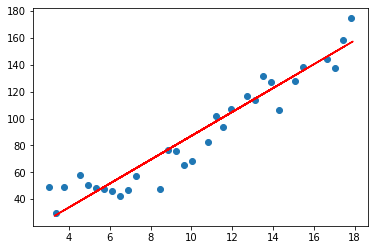

array([ 8.87606127, -1.63126005])

In [37]:
optimize()

In [22]:

def loss(p):
    weight = p[0]
    bias = p[1]
    global X, Y    
    loss = []    
    preds = weight * X + bias   
    for pred, y in zip(preds, Y):
        loss.append((pred - y) ** 2)
    mse = sum(loss) / len(X)
    return mse
def opt():
    #TRAIN MODEL USING SCIPY OPTIMIZER
    res = minimize(loss, [0,0], method='Nelder-Mead', tol=1e-15)
    popt=res.x
    #print("OPTIMAL PARAM:",popt)
    return popt

In [ ]:
def loss(p):
    w = p[0]
    b = p[1]
    sum_ = 0       
    global x_train, y_train
    pred = w*x_train + b
    for i in range (len(x_train)):
        squared_diff =  (y_train[i] - pred[i])**2
        sum_ = sum_ + squared_diff
    MSE = sum_
    #/len(x_train)
    return MSE      


In [23]:
opt()

array([ 8.87606127, -1.63126005])